<figure>
  <IMG SRC="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d5/Fachhochschule_Südwestfalen_20xx_logo.svg/320px-Fachhochschule_Südwestfalen_20xx_logo.svg.png" WIDTH=250 ALIGN="right">
</figure>

# Machine Learning
### Sommersemester 2025
Prof. Dr. Stefan Goetze

# Rückblick Logistic Regression

In diesem Aufgabenblatt wollen wir nochmal auf die Logistische Regression zurückblicken und aus dem Linearen Modell ein eifaches neuronales Netz herleiten.
Dazu schauen wir uns nochmal im Detail an, wie die Modell- und Kostenfunktionen der logistischen Regression aufgebaut sind und implementieren das Gradientenverfahren zur Minimierung der Kostenfunktion per Hand (d.h. mit Python bzw. NumPy).

In [12]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [5]:
# Test Case
m_c, n_c = 20, 4
np.random.seed(0)
X_c = np.random.randn(m_c, n_c)
theta0_c, theta1_c = 0, np.random.randn(n_c, 1)
y_c = np.random.randn(m_c, 1)

Bei der Logistischen Regression haben wir das Gradientenverfahren benutzt, um die Parameter unseres Modells, einer linearen Funktion $$Z = f_{\Theta}(x)=\Theta_0+\Theta_1x$$ transformiert durch die Aktivierungsfunktion $$\hat y = h_{\Theta}(x) = \sigma(Z) = \frac{1}{1+e^{-Z}}$$ schrittweise zu verbessern.
Die Verbesserung, bzw. die Qualität des Modells, haben wir anhand der Kostenfunktion $$J_{\Theta}(x)=-\frac{1}{m} \sum\limits_{i = 1}^{m} [y^{(i)}\log(\hat y^{(i)}) + (1-y^{(i)})\log(1- \hat y^{(i)})]$$ berechnet.

## Modellfunktion
**Aufgabe: Schreibe eine Funktion $f$, die folgende Parameter erhält:**
1. Die Matrix $X \in \mathbb{R}^{m\times{}n}$, die die Datenpunkte des Trainigsdatensatzes enthält.
2. Die Parameter $\Theta$. Dabei ist der Bias Parameter $\Theta_0$ ein skalarer Wert, $\Theta_1$ hingegen ein Vektor aus $\mathbb{R}^n$, in Numpy also mit der Dimension `(n, 1)`.

**$f$ soll folgende lineare Funktion implementieren:** $$Z = f_{\Theta}(X)=\Theta_0+X\Theta_1$$

*Hinweis: Denken Sie daran, dass Matrix-Multiplikationen in NumPy mit dem @-Operator implementiert werden können.**


In [6]:
def f(X, theta0, theta1):
    """evaluates linear function.\n"
    Arguments:\n",
        X: value\n",
        theta0: Bias\n",
        theta1: Function slope\n",
    """
    Z=theta0+X @ theta1
    return Z


In [7]:
# Test Cell
#----------

Z = f(X_c, theta0_c, theta1_c)
#----------
# f

assert Z.shape == (m_c, 1), 'Use correctly sequenced matrix multiplication'
assert np.isclose(Z[0], -4.68171, atol=0.001), 'Expected -4.68171 but got %.5f' %Z[0]

del Z

**Aufgabe: Implementieren Sie die Perzepton-Fuinkion $h$. Die Funktion $h$ soll die gleichen Parameter wie $f$ erhalten und die Funktion $f$ intern aufrufen. Das Ergebnis von $f$ soll durch die Sigmoid-Aktivierungsfunktion transformiert werden.:** $$\hat y = h_{\Theta}(x) = \sigma(Z) = \frac{1}{1+e^{-Z}}$$

*Hinweis: Die Exponentialfunktion angewendet auf ein Argument $z$ können Sie in NumPy mit dem Methodenaufruf `np.exp(z)` berechnen.*

In [11]:
def h(X, theta0, theta1):
    """returns the sigmoid of the linear function.
    Arguments:\n",
        X: Data\n",
        theta0: Bias\n",
        theta1: Function slope\n",
    """
    Z=f(X, theta0, theta1)
    y_hat= 1/(1+np.exp(-Z))
    return y_hat


In [12]:
# Test Cell
#----------

y_hat = h(X_c, theta0_c, theta1_c)
#----------
# h

assert y_hat.shape == (m_c, 1)
assert np.isclose(y_hat[0], 0.00918, atol=0.001), 'Expected 0.00918 but got %.5f' %y_hat[0]

del y_hat

## Kostenfunktion

**Aufgabe: Berechnen Sie nun die Kostenfunktion. Schreiben Sie eine Funktion $J$, die folgende Parameter erhält:**
1. Die Matrix $X \in \mathbb{R}^{m\times{}n}$, die die Datenpunkte des Trainigsdatensatzes enthält. .
2. Die Parameter $\Theta$. Dabei ist der Bias Parameter $\Theta_0$ ein skalarer Wert, $\Theta_1$ hingegen ein Vektor aus $\mathbb{R}^n$, in Numpy also mit der Dimension `(n, 1)`.
3. Die Label $y$ in der Größe des Datensatzes `(m, 1)`.

**$J$ berechnet die folgende Kostenfunktion:** $$J_{\Theta}(x)=-\frac{1}{m} \sum\limits_{i = 1}^{m} [y^{(i)}\log(\hat y^{(i)}) + (1-y^{(i)})\log(1- \hat y^{(i)})]$$


*Hinweis: Sie können die Summe in zwei Teilsummen aufteilen und so die Berechnung vektorisieren:*

 $$-\frac{1}{m} \sum\limits_{i = 1}^{m} [y^{(i)}\log(\hat y^{(i)}) + (1-y^{(i)})\log(1- \hat y^{(i)})] = -\frac{1}{m}  \left( \sum\limits_{i = 1}^{m} y^{(i)}\log(\hat y^{(i)}) + \sum\limits_{i = 1}^{m}(1-y^{(i)})\log(1- \hat y^{(i)})\right)$$

*und $\sum\limits_{i = 1}^{m} y^{(i)}\log(\hat y^{(i)})$ ist einfach das Skalarprodukt aus $y$ und $\log(\hat y)$.*

*Den natürlichen Logarithmus von `x` berechnen Sie in NumPy mit `np.log(x)`, das Skalarprodukt mit `np.dot(a,b)` oder, falls `a` und `b` (2-dimensionale) Spaltenvektoren sind, einfach mit der Matrizenmultiplikation `a.T@b` (`a` wird transponiert, um einen Zeilenvektor zu erhalten).*



In [13]:
def J(X,theta0, theta1, y):
  """computes the Cross-entropy cost function\n",
  Arguments:
  X: Data
  theta0: Bias
  theta1: Function slope
  y: True labels
  """
  y_hat=h(X, theta0, theta1)
  m=np.shape(y_c)[0]
  J=-1/(m)*(y.T@(np.log(y_hat))+(1-y).T@(np.log(1-y_hat)))
  return J.squeeze()

In [14]:
# Test Cell
#----------

cost = J(X_c,theta0_c,theta1_c,y_c)
#----------
# J

assert cost.shape == (), 'Use correctly sequenced matrix multiplication'
assert np.isclose(cost, 1.49867, atol=0.001), 'Expected 0.66739 but got %.5f' %cost

del cost

## Gradientenverfahren

**Schreiben Sie für das Gradientenverfahren eine Funktion `grads`, die folgende Parameter erhält**
1. Die Matrix $X \in \mathbb{R}^{m\times{}n}$, die die Datenpunkte des Trainigsdatensatzes enthält. .
2. Die Parameter $\Theta$. Dabei ist der Bias Parameter $\Theta_0$ ein skalarer Wert, $\Theta_1$ hingegen ein Vektor aus $\mathbb{R}^n$, in Numpy also mit der Dimension `(n, 1)`.
3. Die Label $y$ in der Größe des Datensatzes `(m, 1)`.

**und den Fradienten $\partial\theta$ für die Parameter $\theta$ berechnet**

Dabei ist $\partial\theta_0$ ein Skalar der dem Gradienten des Bias Parameters entspricht: $$\partial\theta_0 = \frac{1}{m} \sum_{i=1}^m (\hat y^{(i)}-y^{(i)})$$

$\partial\theta_1$ ist ein Vektor der Dimension `(n, 1)` mit den Gradienten der anderen Parameter: $$ \partial \theta_1 = \frac{1}{m}X^T(\hat y-y)$$

In [15]:
def grads(X,theta0, theta1,y):
    """Calculates grads of the cost function with respect to the parameters.
    Arguments:
        X: Data
        theta0: Bias
        theta1: Function slope
        y: True labels
    """
    y_hat=h(X, theta0, theta1)
    m=np.shape(y_c)[0]
    dtheta0=(1/m*np.sum(y_hat-y))
    dtheta1=1/m*X.T@(y_hat-y)
    return dtheta0, dtheta1

In [16]:
# Test Cell
#----------

dt0, dt1 = grads(X_c,theta0_c,theta1_c,y_c)
#----------
# grads

assert dt0.shape == (), 'theta0 should be a scaler'
assert dt1.shape == theta1_c.shape
assert np.isclose(dt1[0], -0.22445, atol=0.001), 'Expected -0.22445 but got %.5f' %dt1[0]

**Aufgabe: Schreiben Sie nun eine Funktion, die die Modellparameter aufgrund der berechneten Gradienten aktualisiert.Die Funktion `update`erhält die Parameter $\theta$, die Gradienten $\partial \theta$ sowie die Lernrate $\alpha$ und berechnet:**

$$\theta = \theta - \alpha \cdot \partial \theta$$

In [17]:
def update(theta0, theta1,dtheta0, dtheta1, alpha):
  """updates parameters using gradient decent updating rule."""

  theta0=theta0-alpha*dtheta0
  theta1=theta1-alpha*dtheta1
  return theta0, theta1


In [18]:
# Test Cell
#----------

t0, t1 = update(theta0_c, theta1_c,dt0, dt1, 0.1)
#----------
# update

assert t0.shape == (), 'theta0 should be a scaler'
assert t1.shape == theta1_c.shape
assert np.isclose(t1[0], -1.14270, atol=0.001), 'Expected -0.141491 but got %.5f' %t1[0]
del t0, t1, dt0, dt1

Nun können wir das iterative Gradientenverfahren programmieren.

**Aufgabe: Schreiben Sie eine Funktion `gradient_descent`, die folgende Parameter erhät:**
1. Die Matrix $X \in \mathbb{R}^{m\times{}n}$, die die Datenpunkte des Trainigsdatensatzes enthält. .
2. Die Parameter $\Theta$. Dabei ist der Bias Parameter $\Theta_0$ ein skalarer Wert, $\Theta_1$ hingegen ein Vektor aus $\mathbb{R}^n$, in Numpy also mit der Dimension `(n, 1)`.
3. Die Label $y$ in der Größe des Datensatzes `(m, 1)`.
4. Die Lernrate $\alpha$.
5. Die Anzahl der Iterationen.
**Die Funktion soll die Trainierten Modellparameter $\theta$ zurückgeben.**

*Hinweis*: Berechnen Sie Kosten mit der Funktion `J` und hängen Sie diese Kosten nach jedem BErechnungsschritt and die Liste `cost` an --> Berechnen Sie die Gradienten mit der Funktion `grads` --> Verwenden Sie diese Gradienten um die Parameter mit der Funktion `optim`

In [19]:
def gradient_decent(X, theta0, theta1, y, alpha=0.1, iterations=400):
    """performs gradient decent optimization.
    Arguments:
        X: Data
        theta0: Bias
        theta1: Function slope
        y: True labels
        alpha(default=0.1): Learning rate
        iterations(default=400): number of updating iterations
    """

    costs = []

    for i in range(iterations):
      J_cost=J(X, theta0, theta1, y)
      costs.append(J_cost)
      gradss=grads(X, theta0, theta1, y)
      theta0, theta1=update(theta0, theta1, gradss[0], gradss[1], alpha)
    return theta0, theta1, costs


    return theta0, theta1, costs

In [20]:
# Test Cell
#----------

t0, t1, costs = gradient_decent(X_c, theta0_c, theta1_c, y_c)
#----------
# gradient_decent

assert len(costs) == 400, 'Make sure to calculate and append the cost in every iteration.'
assert np.isclose(t1[3], 2.93724, atol=0.001), 'Expected 1.05186 but got %.5f' %t1[3]

del t0, t1, costs

## Beispiel

Wir habe nun alle Funktionen um unser Perzeptron für einen *echten* Datensatz zu einzusetzen.
Wir verwenden hier den Brustkrebs-Datensatz aus Sklearn:

In [21]:
scaler = MinMaxScaler()
data = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(data.data,data.target,test_size=0.3)

# preprocessing
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = np.expand_dims(y_train, 1)
y_test = np.expand_dims(y_test, 1)

In [22]:
# initializing parameters
theta0 = 0.
theta1 = np.zeros((len(X_train[0]), 1))

#training the model
theta0, theta1, costs = gradient_decent(X_train, theta0, theta1, y_train.reshape(-1, 1), alpha = 2)

<ipython-input-13-f37980db79cd>:11: RuntimeWarning: divide by zero encountered in log
  J=-1/(m)*(y.T@(np.log(y_hat))+(1-y).T@(np.log(1-y_hat)))
<ipython-input-13-f37980db79cd>:11: RuntimeWarning: invalid value encountered in matmul
  J=-1/(m)*(y.T@(np.log(y_hat))+(1-y).T@(np.log(1-y_hat)))


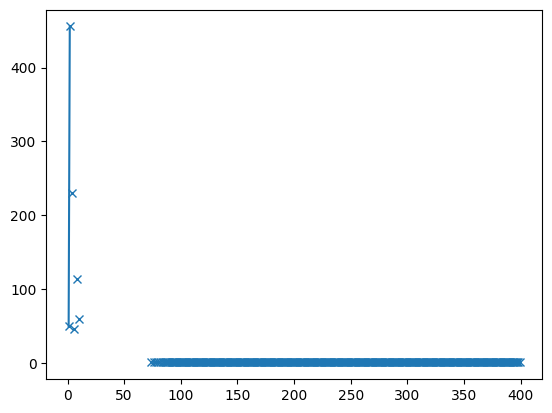

In [23]:
plt.plot(range(1,len(costs)),costs[1:], "x-")
plt.show()

In [24]:
# measuring performance
y_pred = (h(X_test,theta0, theta1) >= 0.5)*1
acc = 100-np.sum(np.abs(y_pred-y_test))*100/len(y_test)


print("Die classifcation accuracy ist: ",acc)

Die classifcation accuracy ist:  98.83040935672514


# Neurale Netze

Bisher haben wir ein Perzeptron betrachtet, also eine Art Neuronales Netz mit nur einer Schicht. Die gleichen Methoden können wir aber auch für mehrschichtige Neuronale Netze verwenden.

## Forward Pass

![](https://github.com/fh-swf-hgi/ml/raw/main/u6/nn-matrices.png)

**Die Lineare Funktion $f$ unserer Netzwerkschicht erhält folgende Parameter:**
1. Die Matrix $A \in \mathbb{R}^{n^{[i]}\times{}m}$, mit den Eingabedaten der Netzwerkschicht $i$. Die Zeilen von $A$ enthalten die einzelnen Datenpunkte. Die Spalten von $A$ entsprechend den Merkmalen (und damit den Parametern) eines voll-vermaschten Neurons der aktuellen Schicht.
2. Einem Vektor $b \in \mathbb{R}^{n^{[i]}}$ mit den Bias Parametern der Netzwerkschicht $i$.
3. Die Matrix $W \in \mathbb{R}^{n^{[i-1]}\times{}n^{[i]}}$ mit den Gewichten der Netzwerkschicht $i$.

**und liefert folgendes Ergebnis $Z$ zurück:** $$Z = f_{\Theta}(A)= b + AW$$


In [1]:
def f(A, b, W):
    """evaluates linear function.
    Arguments:
        A: Layer input data
        b: Biases vector
        W: Weights matrix
    """
    Z = b + A@W
    cache = (A, b, W) # wir merken uns die Werte A, b, und W in jeder Schicht des netzes

    return Z, cache

**Als Aktivierungsfunktion verwenden wir die (nichtlineare) Sigmoid-Funktion.
Die Funktion erhält die gleichen Parameter wie  `f` und ruft `f` auch intern auf:**
$$A^{[i+1]}= h_{\Theta}(A^{[i]}) = \sigma(Z) = \frac{1}{1+e^{-Z}}$$

In [2]:
def h(A, b, W):
    """computes the sigmoid of the linear function.
    Arguments:
        A: Layer input data
        b: Biases vector
        W: Weights matrix
    """

    Z, Zcache = f(A, b, W)
    A = 1.0 / (1.0+np.exp(-Z))
    cache = (Zcache, Z) # Zu der Eingabe der Schicht merken wir uns im cache den wert der linearen Funktion f

    return A, cache

Wie die Abbildung oben zeigt, ist die Größe des Netzes durch die Anzahl der Neuronen auf jeder Schicht festgelegt.
Kennt man die Anzahl der Neuronen, kann man die Parameter-Matrizen $W$ und die Vektoren für die Bias Parameter $b$ initialisieren:

In [3]:
def init(dims):
    """returns initial weights and biases."""
    #dims = [X,L1,L2,...,y]
    b = []
    W = []

    for l in range(1, len(dims)):
        b.append(np.zeros((1, dims[l])))
        W.append(np.random.randn(dims[l-1], dims[l])*0.01) # to break symmetry, it's good to have non-zero weights

    return b, W

Da wir nun die Modellfunktionen für die einezelnen Schichten erstellt haben (und unser Netzwerk auf allen Schichten die gleiche Aktivierungsfunktion nutzt), können wir nun recht einfach eine Funktion für den gesamten **Forward Pass** definieren.
Die Funktion `forward` erhält als Parameter die Eingabedaten `X`, sowie **Listen** der Bias-Parameter und der Modellparameter für die einzelnen Schichten. Beachten Sie, dass jedes Element der Listen einen Vektor, bzw. eine Matrix mit den Parametern einer Schicht enthält.
Die Länge dieser Listen entspricht also der Tiefe des Neuronalen Netzes.

In [4]:
def forward(X, b, W):
    """Performs a forward propagation through all layers.
    returns the output layer and cache of intermidiates.
    """

    caches = []
    A = X

    for l in range(len(b)):
        A_prev = A
        A, cache = h(A_prev, b[l], W[l])
        # Hänge den cache jeder Schicht an die Liste Caches an
        caches.append(cache)

    return A, caches

Nachdem wir am Ende des Forward Passes unsere Schätzung berechnet haben, müssen wir für diese Schätzung die Kosten berechnen.
Die Funktion `J` erhält folgende Parameter:
1. Die vom Modell vorhergesagten Label $\hat{y}$ in der Größe des Datensatzes (1, m)
3. Die tatsächlichen Label unseres Datensatzes $y$, ebenfalls in der Größe (1, m)

**Als Kostenfunktion verwenden wir wie schon bei der Logistischen Regression die Kreuzentropie:**
$$J(W,b)-\frac{1}{m} \sum\limits_{i = 1}^{m} [y^{(i)}\log(\hat{y}^{(i)}) + (1-y^{(i)})\log(1- \hat{y}^{(i)})]$$

In [5]:
def J(y_pred, y):
    """evaluates Cross-entropy cost function."""
    J = -(y.T@np.log(y_pred) + ((1.0-y.T)@np.log(1.0-y_pred)))/len(y)

    return J

## Backpropagation

Der Backpropagation (zu dt. *Fehlerrückführung*) Algorithmus ist ein Spezialfall des Gradientenverfahrens und das am meisten eingesetzte Verfahren zum Trainieren neuronaler Netze.

Um Backpropagation zu implementieren definieren wir eine Funktion mit folgenden Parametern:
1. Den Gradienten der Kosten nach der Aktivierungsfunktion ($\partial A$)
2. Die zwischengespeicherten Werten $f$ und $h$ der Aktivierungs- und Übertragungsfunktionen aus dem Forward Pass.

Zurückgeliefert werden die Gradienten $\partial b, \partial W, und \partial A_{prev}$:

$\partial b$ ist ein Vektor mit den Gradienten der Bias Parameter: $$\partial b = \frac{1}{m} \sum_{i=1}^m (\partial z^{(i)})$$


$\partial W$ ist eine Matrix mit den Gradienten der Gewichte: $$ \partial W = \frac{1}{m}A_{prev}^T\partial Z$$

$\partial A_{prev}$ ist der Grantient der Kostenfunktion bezüglich der Aktivierungsfunktion $A$ der nächstvorderen Schicht:  $$\partial A_{prev} = \frac{1}{m}\partial ZW^T$$



In [6]:
def back(dA, cache):
    """calculates grads w.r.t. linear function."""

    Zcache, Z = cache

    sigma = 1/(1+np.exp(-Z))
    dZ = dA * sigma * (1-sigma)

    A_prev, b, W = Zcache

    m = len(A_prev[0])
    db = np.sum(dZ, axis=0, keepdims=True)/m
    dW = (A_prev.T@dZ)/m
    dA_prev = (dZ@W.T)/m

    return dA_prev, db, dW

**Wir können nun die Funktion `back` auf allen Schichten des Modells, beginnend mit der Ausgabeschicht und endend auf der Eingabeschicht aufrufen.**

In [7]:
def grads(y_hat, y, caches):
    """performs backprobagation through all layers to calculate grads of all parameters."""

    db = []
    dW = []

    dA = -(y/y_hat - (1-y)/(1-y_hat)) # Gradient der Kostenfunktion auf der Ausgabeschicht

    for l in reversed(range(len(caches))):
        # Backward step
        dA, db_, dW_ = back(dA, caches[l])

        db.insert(0, db_)
        dW.insert(0, dW_)

    return db, dW

## Optimization

Für das Gradientenverfahren benötigen wir noch eine Funktion, die uns die Parameter jeder Schicht, basierend auf den berechneten Gradienten anpasst.
Diese Funktion `optim` erhält als Parameter:
1. Die Parameter des Neuronalen Netzes ($b, W$),
2. die Gradienten der einzelnen Schichten ($\partial b, \partial W$)
3. sowie die Lernrate $\alpha$.

Die Funktion liefert die aktualisierten Parameter ($b, W$) zurück.

In [8]:
def optim(parameters, grads, alpha):
    """updates parameters using gradient decent updating rule."""

    b, W = parameters
    db, dW = grads

    for l in range(len(b)):
        b[l] = b[l] - alpha*db[l]
        W[l] = W[l] - alpha*dW[l]

    return b, W

## Ein Modell Trainieren

Wir können nun unser selbst programmiertes MLP Netzwerk mit einem echten Datensatz trainieren. Wir verwenden hier den bekannten MNIST Datensatz.

In [9]:
try:
    from tensorflow.keras import datasets , utils
except:
    import sys
    !{sys.executable} -m pip install --upgrade pip
    !{sys.executable} -m pip install tensorflow
    #!{sys.executable} -m pip install tensorflow-macos tensorflow-metal
    from tensorflow.keras import datasets , utils

In [10]:
#Importing MNIST from tensorflow dataset liabrary

(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Wenn wir den Datensatz geladen haben, können wir uns einige Beispiele der Daten anzeigen lassen:

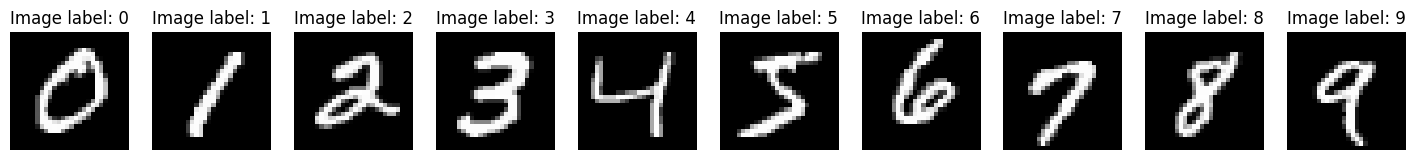

In [13]:
fig, ax = plt.subplots(1, 10, figsize=(18,3))

for i in range(10):
    ax[i].set_title('Image label: %d' %i)
    ax[i].axis('off')
    ax[i].imshow(X_train[y_train == i][0], cmap='gray')
plt.show()

Für unser MLP Netzwerk machen wir aus den $28\times{}28$ Pixel großen Bildern der Ziffern eindimensionale Vektoren der Länge $748$.

In [14]:
# preprocessing
print("Vorher:", X_train.shape)
X_train = X_train.reshape(-1, 28*28)/255
X_test = X_test.reshape(-1, 28*28)/255
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)
print("Nachher:", X_train.shape)

Vorher: (60000, 28, 28)
Nachher: (60000, 784)


Nun stellen wir aus allen zuvor definierten Funktionen unser Modell auf:

In [15]:
def model(X, y, layers_dims, alpha = 0.01, epoch = 20, batch_size = 400):
    """MLP, das die Softmax-Kostenfunktion mit dem Gradientenverfahren optimiert.
    X: Eingabedatem
    y: Labels
    layers_dims: Liste mit en Dimensionen der Schichten
    alpha(default = 0.01): Lernrate
    epoch(default = 20): Anzahl der zu trainierenden Epochen
    batch_size(default = 400): Größe eines Minibatches
    """

    costs = []
    parameters = init(layers_dims)
    b, W = parameters

    for i in range(epoch):

        for batch in range(0,len(y),batch_size):
            y_hat, caches = forward(X[batch:batch+batch_size], b, W)
            cost = J(y_hat, y[batch:batch+batch_size])
            gradss = grads(y_hat, y[batch:batch+batch_size], caches)
            parameters = optim(parameters, gradss, alpha)
            b, W = parameters

        costs.append(cost.item(0))
        print(f'Epoch {i}: {cost.item(0)}')

    plt.plot(range(1,len(costs)),costs[1:], "x-")
    plt.show()
    return parameters

Epoch 0: 0.060287553814951246
Epoch 1: 0.05095891631877713
Epoch 2: 0.04675483760431854
Epoch 3: 0.04421629126356605
Epoch 4: 0.042466192723098935
Epoch 5: 0.041160340606772976
Epoch 6: 0.04013259974344578
Epoch 7: 0.03929204624885275
Epoch 8: 0.03858442353616849
Epoch 9: 0.037975212457469286
Epoch 10: 0.037441329022720585
Epoch 11: 0.03696670496036814
Epoch 12: 0.036539779618891044
Epoch 13: 0.03615200107999935
Epoch 14: 0.0357968912421721
Epoch 15: 0.03546944123546464
Epoch 16: 0.03516570816273644
Epoch 17: 0.03488253879990386
Epoch 18: 0.03461737576723645
Epoch 19: 0.0343681186867221


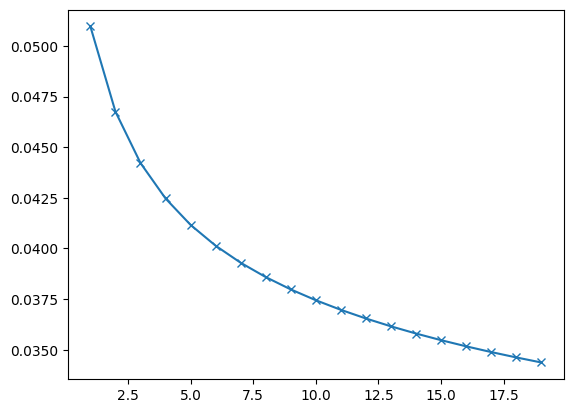

In [16]:
trained_weights_10 = model(X_train, y_train, [28*28, 10], 0.5)

In [17]:
class mlp_model:

    def __init__(self, X, y, layers_dims):
        """MLP Modell
        X: Eingabedatem
        y: Labels
        layers_dims: Liste mit en Dimensionen der Schichten
        """
        self.X = X
        self.y = y
        self.costs = []
        self.parameters = init(layers_dims)

    def fit(self, alpha = 0.01, epoch = 20, batch_size = 400):
        """MLP, das die Softmax-Kostenfunktion mit dem Gradientenverfahren optimiert.
        alpha(default = 0.01): Lernrate
        epoch(default = 20): Anzahl der zu trainierenden Epochen
        batch_size(default = 400): Größe eines Minibatches
        """

        b, W = self.parameters

        for i in range(epoch):

            for batch in range(0,len(self.y),batch_size):
                y_hat, caches = forward(self.X[batch:batch+batch_size], b, W)
                cost = J(y_hat, self.y[batch:batch+batch_size])
                gradss = grads(y_hat, self.y[batch:batch+batch_size], caches)
                self.parameters = optim(self.parameters, gradss, alpha)
                b, W = self.parameters

            self.costs.append(cost.item(0))
            print(f'Epoch {i}: {cost.item(0):.5}')

        plt.plot(range(1,len(self.costs)),self.costs[1:], "x-")
        plt.show()
        return self.parameters

    def predict(self, X):
        """Vorhersagefunktion für das trainierte Modell."""

        b, W = self.parameters
        y_pred, _ = forward(X, b, W)

        return (y_pred>=0.5)*1

    def accuracy(y_test, y_pred_0):
        return 100-np.sum(np.abs(y_pred_0-y_test))*100/len(y_test)

Epoch 0: 0.06081
Epoch 1: 0.051314
Epoch 2: 0.047019
Epoch 3: 0.044423
Epoch 4: 0.042634
Epoch 5: 0.041299
Epoch 6: 0.040249
Epoch 7: 0.039391
Epoch 8: 0.03867
Epoch 9: 0.038049
Epoch 10: 0.037505
Epoch 11: 0.037023
Epoch 12: 0.036589
Epoch 13: 0.036195
Epoch 14: 0.035835
Epoch 15: 0.035503
Epoch 16: 0.035195
Epoch 17: 0.034908
Epoch 18: 0.03464
Epoch 19: 0.034388


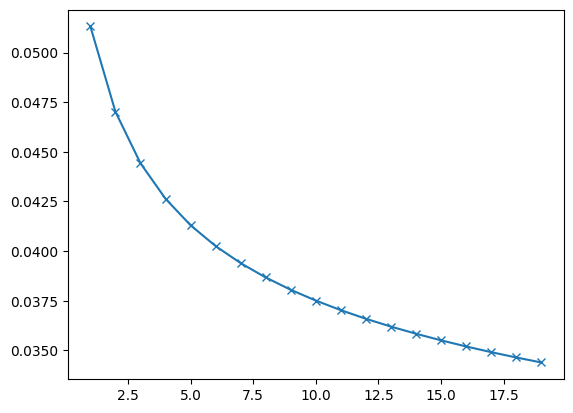

In [18]:
model_10 = mlp_model(X_train, y_train, [28*28, 10])
trained_weights_10 = model_10.fit(0.5)

In [19]:
y_pred_10 = model_10.predict(X_test)
mlp_model.accuracy(y_test, y_pred_10)

np.float64(79.87)

Epoch 0: 0.10187
Epoch 1: 0.077211
Epoch 2: 0.066411
Epoch 3: 0.058203
Epoch 4: 0.05083
Epoch 5: 0.045773
Epoch 6: 0.042791
Epoch 7: 0.041198
Epoch 8: 0.04044
Epoch 9: 0.040156
Epoch 10: 0.040129
Epoch 11: 0.040231
Epoch 12: 0.040386
Epoch 13: 0.040552
Epoch 14: 0.04071
Epoch 15: 0.040853
Epoch 16: 0.04098
Epoch 17: 0.041096
Epoch 18: 0.041205
Epoch 19: 0.041307


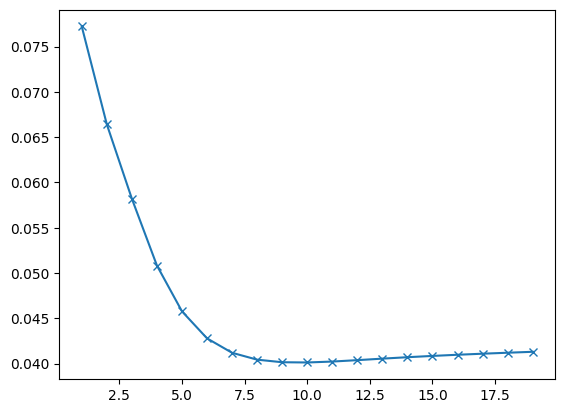

In [20]:
model_20_10 = mlp_model(X_train, y_train, [28*28, 20, 10])
trained_weights_20_10 = model_20_10.fit(0.5)

In [21]:
y_pred_20_10 = model_20_10.predict(X_test)
mlp_model.accuracy(y_test, y_pred_20_10)

np.float64(83.83)

# Neuronale Netze mit Keras

In dieser Aufgabenblatt geht es darum, ein einfachen Künstliches Neuronales Netz für ein Regressionsproblem mit der Keras API zu implementieren.

Wir verwenden den *Boston Housing* Datensatz, der als Standard-Anwendungsbeispiel über die Keras API heruntergeladen werden kann.

Der Datensatz beschreibt die Wohnverhältnisse in verschieden Gebieten um Boston in den 1970er Jahren.
Er enthält 506 Einträge mit jeweils 13 numerischen Merkmalen, die Zielvariable beschreibt den mittleren Wert der Häuserpreise in dem jeweiligen Bezirk (in Tausend USD).

Gute Modelle sollten Vorhersagen mit einer mittlere quadratische Abweichung (*mean squared error*, MSE) unterhalb 20 (Tausend USD) treffen.



Zuerst binden wir die wichtigsten Bibliotheken ein und laden den Datensatz mit der Funktion `boston_housing.load_data()` herunter.

In [22]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import models, layers, datasets

In [23]:
(X_train, y_train), (X_test, y_test) = datasets.boston_housing.load_data()

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [24]:
mean = X_train.mean(axis=0)
X_train -= mean
std = X_train.std(axis=0)
X_train /= std

X_test -= mean
X_test /= std

X_test.shape

(102, 13)

In [25]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Nachdem die Modellparameter zusammengestellt sind, muss die Eigentliche Modellfunktion erstellt werden.
In Tensorflow wird damit der Graph des Modells erzeugt.
Die `compile`-Funktion kann mit verschiedenen Parametern angepasst werden:
- `optimizer` legt die Art (den Algorithmus) des Gradientenverfahrens fest. (https://keras.io/optimizers/)
- `loss` bestimmt die Art der Kostenfunktion (https://keras.io/losses/)
- `metrics` legt fest, welche Qualitätsmerkmale beim Trainieren überprüft werden sollen (https://keras.io/metrics/)



In [26]:
model.compile(
    optimizer='SGD',
    loss='mse',
    metrics=['mae','mape'])

Um die Ergebnisse zu visulaisieren, legen wir ein Log-Verzeichnis pro Lauf des Verfahrens an, in das wir die Informationen der `fit`-Funktion schreiben.
Damit können wir später die Ergebnisse der einzelnen Trainingsläufe vergeleichen.

In [27]:
import time
newlog = '.\\keras_data\\run_' + time.strftime("%Y%m%d-%H%M%S")
tbCallBack = tf.keras.callbacks.TensorBoard(log_dir=newlog, histogram_freq=0, write_graph=True, write_images=True)

Nun rufen wir die `fit`-Funktion auf, um die Modellparameter zu lernen.

In [28]:
model.fit(
    X_train,
    y_train,
    epochs=200,
    batch_size=64,
    callbacks=[tbCallBack]
)

Epoch 1/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 395.1206 - mae: 17.3805 - mape: 78.7032
Epoch 2/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 248.9210 - mae: 12.9169 - mape: 55.6985
Epoch 3/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 153.6033 - mae: 9.8416 - mape: 43.9906
Epoch 4/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 72.0348 - mae: 6.1526 - mape: 26.7794
Epoch 5/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 19.5476 - mae: 2.9254 - mape: 14.7900
Epoch 6/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 464.4779 - mae: 17.1305 - mape: 71.5296
Epoch 7/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 196.0609 - mae: 10.9110 - mape: 49.1825
Epoch 8/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 55.6033 - mae: 5.3045 - mape: 25.9115
Epoch 9/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 82.0816 - mae: 6.3273 - mape: 34.2370  
Epoch 10/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 50.1287 - mae: 4.1427 - mape: 20.9068 
Epoch 11/200
7/7 ━━━━━━━━━━━━━

Nach dem Training verwenden wir die Testdaten, um unser trainiertes Modell zu evaluieren

In [29]:
mse_score, mae_score, mape_score = model.evaluate(X_test, y_test, verbose=False)
print("Mittlwert der Fehlerquadrate: ", mse_score)
print("Mittlerer absoluter Fehler: ", mae_score)
print("Mittlerer absoluter Fehler (in Prozent): ", mape_score)

Mittlwert der Fehlerquadrate:  11.1054048538208
Mittlerer absoluter Fehler:  2.248093843460083
Mittlerer absoluter Fehler (in Prozent):  11.921957969665527


Das Trainierte Modell schätzt die Häuserpreise vermutlich nicht sonderlich gut.
Dies liegt an der sehr unglücklichen Wahl der (Hyper-)Parameter.
Versuchen Sie die Parameter sinnvoll anzupassen, sodass sich die Qualität der Schaätzfunktion verbessert.

Um die Log-Dateien sowie den Modellgraphnen zu visualisieren, können die Tensorboard verwenden.
Rufen Sie daszu (im Verzeichnis der *.ipynb* Datei) das Kommando `tensorboard --logdir=./keras_data` auf.
Wenn Tensorboard gestartet ist, erreichen Sie die Web-Oberfläche unter der URL `localhost:8008`.

In [30]:
for a in model.get_weights():
    print(np.shape(a))

(13, 32)
(32,)
(32, 64)
(64,)
(64, 1)
(1,)


In [31]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,627 (10.27 KB)

 Trainable params: 2,625 (10.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Wir verwenden nun in einem zweiten Beispiel Keras mit dem MNIST Datensatz:

### Beschaffen der Daten und Vorverarbeiten

1. Daten mit `datasets.mnist.load_data()` laden
2. Bilder in eindimensionale Arrays umwandeln mit `reshape`. Teilen durch 255 um zu Normalisieren.
3. One-Hot Encoding der Labels mit `utils.to_categorical`

In [47]:
# Data loading
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()
#(None, None), (None, None)
# YOUR CODE HERE
X_train=X_train.reshape(len(X_train),784)/255
X_test=X_test.reshape(len(X_test),784)/255
y_train=y_train/255
y_test=y_test/255

y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)

# Data preprocessing
# YOUR CODE HERE


In [48]:
# Test Cell
#----------

assert X_train.ptp() == X_test.ptp() == 1, 'Data is not nomalized'
assert X_train.shape == (60000, 784)
assert X_test.shape == (10000, 784)
assert y_train.shape == (60000, 10), 'Make sure to one hot encode train labels'
assert y_test.shape == (10000, 10), 'Make sure to one hot encode test labels'

AttributeError: `ptp` was removed from the ndarray class in NumPy 2.0. Use np.ptp(arr, ...) instead.

### Das Modell aufstellen
Erstellen Sie ein Modell mit geeigneten Hyperparametern:

*Hinweise:*
- Verwenden Sie die `softmax` Aktivierungsfunktion um die Ausgabeschicht in eine Wahrscheinlichkeitsfunktion umzuwandeln.
- `input_shape` ist ein Vektor der Dimension `(784,)`

In [ ]:
mnist_model = None

# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# Test Cell
#----------

assert type(mnist_model) == models.Sequential
assert mnist_model.built, 'The model is not built'
assert len(mnist_model.layers) > 2, 'You should have at least one hidden layer'
assert mnist_model.input_shape[1:] == X_train[0].shape, 'Input must match the features of the image'
assert mnist_model.output_shape[1] == 10, 'Output must match the number of classes'

### Modell Kompilieren
Verwenden Sie `compile` um den `optimizer`, die `loss` Funktion und die `metrics` festzulegen.

*Hinweise:*
- Da wir `softmax` verwenden, wählen wir die Kostenfunktion `categorical_crossentropy`.
- `accuracy` ist an dieser Stelle eine gute Metrik für die Klassifikation

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# Test Cell
#----------


assert mnist_model.loss
assert mnist_model.optimizer

### Training
Trainieren Sie das Modell mit der `fit` Funktion.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# Test Cell
#----------

assert len(mnist_model.history.epoch) >= 2

### Testen
Evaluieren Sie das Modell mit der `evaluate` Funktion:

In [ ]:
loss, acc = [None]*2

# YOUR CODE HERE
raise NotImplementedError()
print("loss: %.4f - accuracy: %.4f " %(loss, acc))

### Visualisierung

In [ ]:
img_i = np.random.randint(10000, size=8)
fig, ax = plt.subplots(1, 8, figsize=(18,3))
for i, j in enumerate(img_i):
    ax[i].set_title('True: %d\nPredicted: %d' %(np.argmax(y_test[j]),
                np.argmax(mnist_model.predict(X_test[j].reshape(1, -1)), axis=-1)))
    ax[i].axis('off')
    ax[i].imshow(X_test[j].reshape(28,28), cmap='gray')
plt.show()

In [ ]:
mnist_model.summary()

## Referenzen:
[1] M. Berthold, C. Borgelt, F. Höppner and F. Klawonn, Guide to Intelligent Data Analysis, London: Springer-Verlag, 2010.  
[2] A. Ng, Machine Learning Yearning, deeplearning.ai, 2018.  

**Tipp:** Schauen Sie sich die Playlist von *3Blue1Brown* über Neuronale Netze auf [Youtube](https://www.youtube.com/playlist?list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi) an